# Exercise 4.10 - Part 2

## Business Questions:

1. The sales team needs to know what the busiest days of the week and hours of the
day are (i.e., the days and times with the most orders) in order to schedule ads at
times when there are fewer orders.

2. They also want to know whether there are particular times of the day when people
spend the most money, as this might inform the type of products they advertise at
these times.

3. Instacart has a lot of products with different price tags. Marketing and sales want to
use simpler price range groupings to help direct their efforts.

4. Are there certain types of products that are more popular than others? The marketing
and sales teams want to know which departments have the highest frequency of
product orders.

5. The marketing and sales teams are particularly interested in the different types of
customers in their system and how their ordering behaviors differ.

For example:

 a. What’s the distribution among users in regards to their brand loyalty (i.e., how
often do they return to Instacart)? 

 b. Are there differences in ordering habits based on a customer’s loyalty status?
 
 c. Are there differences in ordering habits based on a customer’s region?
 
 d. Is there a connection between age and family status in terms of ordering
habits?

 e. What different classifications does the demographic information suggest?
Age? Income? Certain types of goods? Family status?

 f. What differences can you find in ordering habits of different customer
profiles? Consider the price of orders, the frequency of orders, the products
customers are ordering, and anything else you can think of.

# Import libraries & Data set

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [3]:
# Import Data set
path=r'C:\Users\swati\Instacart Basket Analysis'
df_all_merged = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_final.pkl'))
df_dept_dict = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [4]:
df_all_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_freq', 'order_freq_flag',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependants',
       'family_status', 'income', 'region', 'activity_flag', 'age_profile',
       'income_profile', 'family_profile'],
      dtype='object')

In [5]:
df_all_merged.shape

(32404859, 36)

In [6]:
df_dept_dict.columns

Index(['Unnamed: 0', 'department'], dtype='object')

In [7]:
df_dept_dict.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)
df_dept_dict

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [8]:
# Merge department's dictionary dataframe with df_all_merged dataframe
df_all = df_all_merged.merge(df_dept_dict, on = 'department_id')

In [9]:
df_all.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_freq', 'order_freq_flag',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependants',
       'family_status', 'income', 'region', 'activity_flag', 'age_profile',
       'income_profile', 'family_profile', 'department'],
      dtype='object')

In [10]:
df_all.shape

(32404859, 37)

#### 1. The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

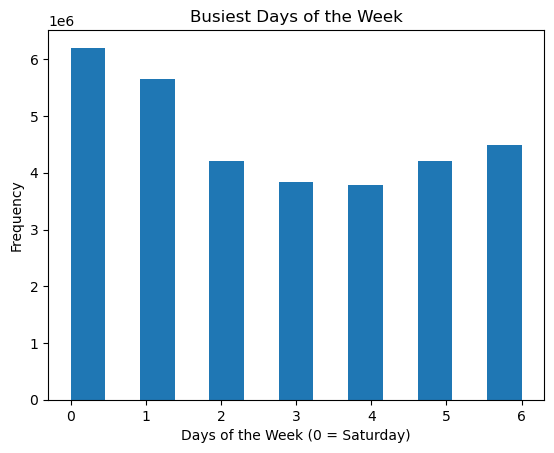

In [11]:
# Create hisstogram
busiest_days = df_all['orders_day_of_week'].plot.hist(bins = 13, title='Busiest Days of the Week')
plt.xlabel('Days of the Week (0 = Saturday)')
plt.show()

In [12]:
# Export chart
busiest_days.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Busiest_days_of_week.png'))

Saturday and Sunday are busiest days of the week

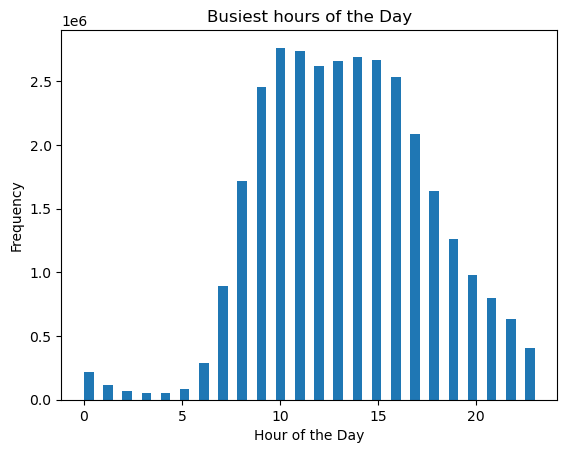

In [13]:
# Create chart for busiest hours of the day
busiest_hours = df_all['order_hour_of_day'].plot.hist(bins = 47, title='Busiest hours of the Day')
plt.xlabel('Hour of the Day')
plt.show()

In [14]:
# Export Chart
busiest_hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Busiest_hours_of_day.png'))

#### 2. They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

In [15]:
# Group & Aggregate to find busiest hours of the day on price
busiest_hours_price = df_all.groupby('order_hour_of_day').agg({'prices' : ['sum']})
busiest_hours_price = busiest_hours_price.sort_values(by=('prices', 'sum'), ascending=False)
busiest_hours_price

,prices
,sum
order_hour_of_day,
11,33268554.8
10,32868237.5
15,32400773.8
16,31793097.5
14,31569115.4
12,31280439.7
13,30541285.8
9,28830061.7


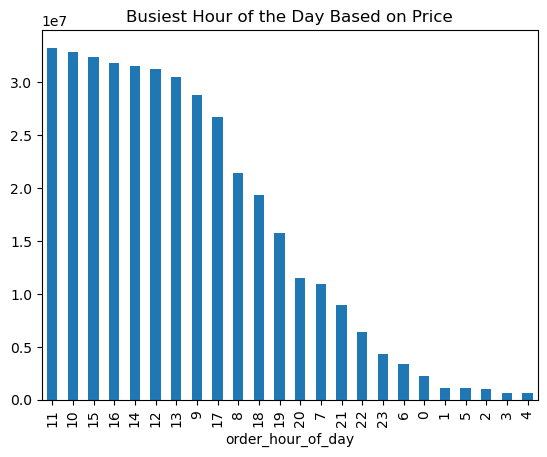

In [16]:
# Create bar chart for busiest hour of the day based on price
busiest_hours_price = busiest_hours_price.plot.bar(legend = None,title ='Busiest Hour of the Day Based on Price')
plt.show()

In [17]:
# Export Chart
busiest_hours_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Busiest_hours_price.png'))

In [18]:
# Find department orders during busiest hour of day
busiest_hour_dept = df_all[df_all['order_hour_of_day'] == 11]

In [19]:
# Check frequency of orders by department during busiest hour
busiest_hour_dept['department'].value_counts(dropna = False)

produce            796168
dairy eggs         451953
snacks             254676
beverages          234133
frozen             177203
pantry             161397
bakery              98007
canned goods        93032
deli                89341
dry goods pasta     72273
household           63906
meat seafood        60280
breakfast           58644
personal care       36747
babies              31896
international       23101
alcohol             13800
pets                 7879
missing              5809
other                2977
bulk                 2918
Name: department, dtype: int64

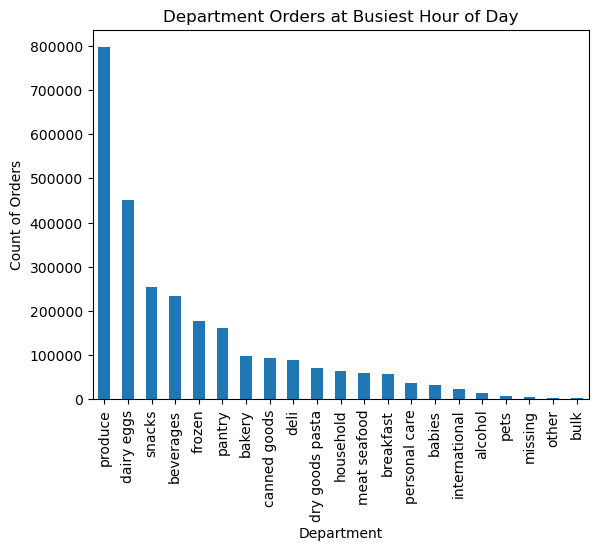

In [20]:
#Create bar chart 
dept_count = busiest_hour_dept['department'].value_counts(dropna=False)
busiest_dept = dept_count.plot.bar(title='Department Orders at Busiest Hour of Day')
plt.xlabel('Department')
plt.ylabel('Count of Orders')
plt.show()

In [21]:
# Export Chart
busiest_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Busiest_dept_hod.png'))

#### 3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

In [22]:
df_all['spending_flag'].value_counts(dropna = False)

Low Spender     31770614
High Spender      634245
Name: spending_flag, dtype: int64

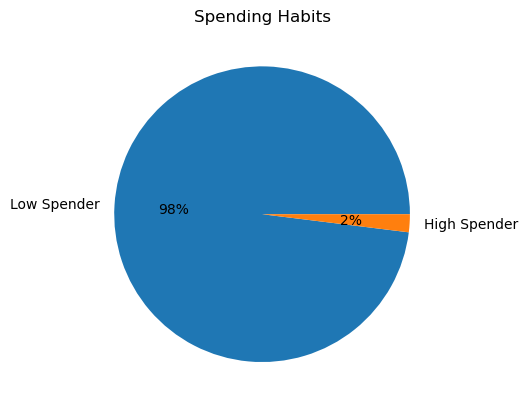

In [23]:
# Create pie chart based on spending
spending_flag_pie = df_all['spending_flag'].value_counts(dropna = False).plot.pie(title = 'Spending Habits', label = '', autopct = ('%1.f%%'))

#### 4. Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [24]:
# Find popular departmnet by frequency of orders
df_all['department'].value_counts(dropna = False)

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

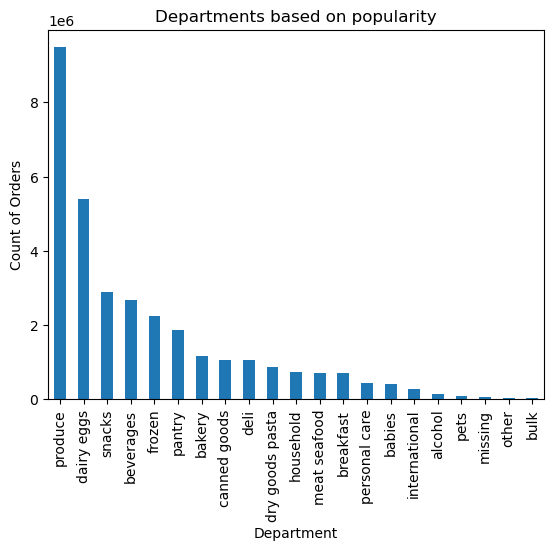

In [25]:
# Create bar chart 
popular_dept_count = df_all['department'].value_counts(dropna=False)
popular_dept = popular_dept_count.plot.bar(title = 'Departments based on popularity')
plt.xlabel('Department')
plt.ylabel('Count of Orders')
plt.show()

In [26]:
# Export chart
popular_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'popular_dept.png'))

#### 5. The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors         differ.
a. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

In [30]:
# Create crosstab between orders count(freq) and loyalty flag 
loyalty_frequency = pd.crosstab(df_all['loyalty_flag'], df_all['order_freq_flag'], dropna = False)

In [31]:
loyalty_frequency

order_freq_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,10279960,0,4133
New customer,1648671,2724962,1870352
Regular customer,9631222,911475,5334079


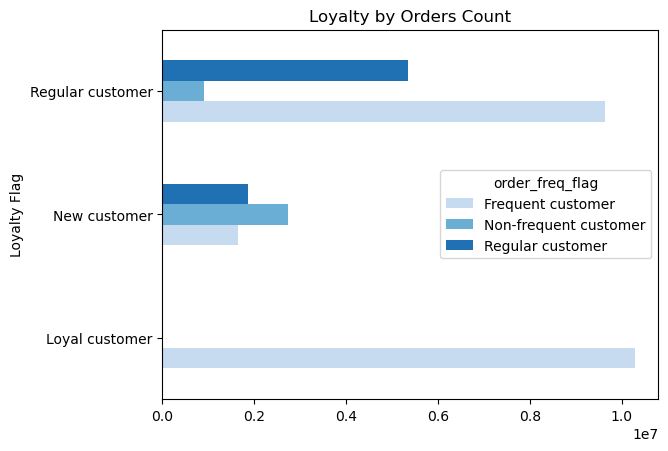

In [36]:
# Create bar chart for loyalty_frequency
loyalty_frequency_bar = loyalty_frequency.plot.barh(color = sns.color_palette('Blues', 3),title = 'Loyalty by Orders Count')
plt.ylabel('Loyalty Flag')
plt.show()

#### Hightest count of orders is by Loyal Customers followed by Regular customers.

In [38]:
# Export chart
loyalty_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Distribution_orders_by_loyalty.png'))

b. Are there differences in ordering habits based on a customer’s loyalty status?

In [39]:
# Check the frequency of loyalty flag
df_all['loyalty_flag'].value_counts(dropna = False)

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

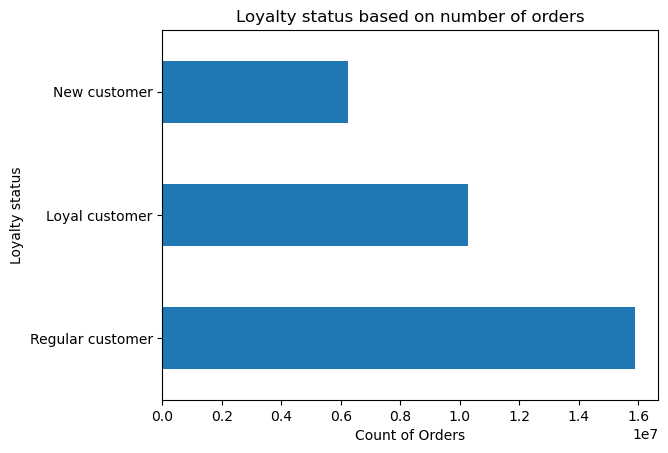

In [40]:
# Create bar chart for loyalty status 
loyalty_status = df_all['loyalty_flag'].value_counts(dropna=False)
loyalty_status_habits = loyalty_status.plot.barh(title = 'Loyalty status based on number of orders')
plt.ylabel('Loyalty status')
plt.xlabel('Count of Orders')
plt.show()

#### Highest count of orders is by Regular customers .

In [41]:
# Export chart
loyalty_status_habits.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_order_habits.png'))

c. Are there differences in ordering habits based on a customer’s region?

In [43]:
region_orders_count = df_all['region'].value_counts(dropna = False)
region_orders_count

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

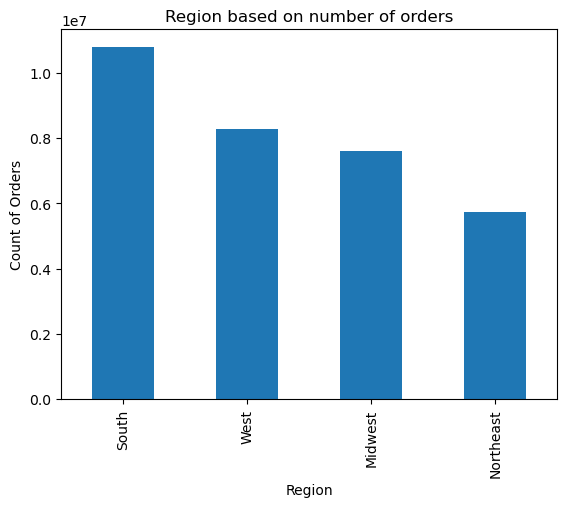

In [47]:
# Create bar chart on numbers of orders based on regions 
region_orders = region_orders_count.plot.bar(title = 'Region based on number of orders')
plt.xlabel('Region')
plt.ylabel('Count of Orders')
plt.show()

#### South region is ahead in number of orders

In [48]:
# Export chart
region_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Orders_by_region.png'))

d. Is there a connection between age and family status in terms of ordering habits?

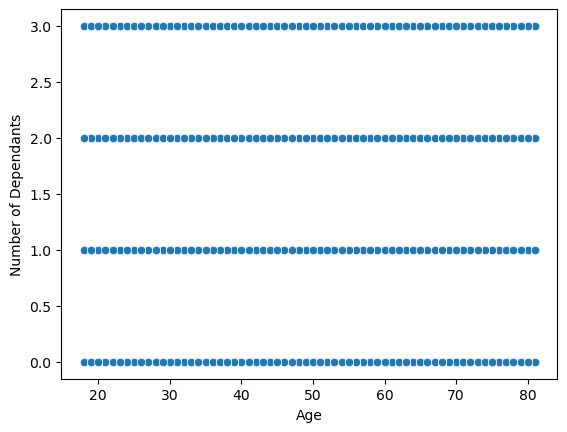

In [54]:
# Creating scatterplot for age and number of dependants
age_family_status = sns.scatterplot( x = 'age', y = 'number_of_dependants',data = df_all)
plt.title = ('Relationship between age and number of dependants')
plt.xlabel('Age')
plt.ylabel('Number of Dependants')
plt.show()

In [55]:
# Export chart 
age_family_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age_family_Status.png'))